In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [9]:
filename = 'Concrete_Data_Yeh_final.csv'
variables = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

class PreProcessing:
    "The aim of this class is to successfully replace all the empty values from"
    "the file given, and to split the columns into their own series / arrays."
    def __init__(self, file):
        self.data = pd.read_csv(file)

    def checkNaN (self):
        return self.data.isnull().sum()

    def FillNaN (self) -> pd.DataFrame:
        df1 = self.data
        data = df1.values
        # split into input and output elements
        ix = [i for i in range(data.shape[1]) if i != 8]
        X, y = data[:, ix], data[:, 8]
        # print total missing
        print('Missing: %d' % sum(np.isnan(X).flatten()))
        # define imputer
        imputer = KNNImputer()
        # fit on the dataset
        imputer.fit(X)
        # transform the dataset
        Xtrans = imputer.transform(X)
        # print total missing
        print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))
        df = pd.DataFrame(Xtrans)
        df.insert(len(df.columns), 'csMPa', y)
        df.columns = df1.columns
        print(df.to_string())
        return df

    
    def set_age_log(self):
        math.log(self.data[age])

#test = PreProcessing(filename).checkNaN()
#print('Number of NaN values in each column from the original csv file: \n' ,test)

concretedata = PreProcessing(filename).FillNaN()
#concretedata.head(10)

print(concretedata.min())
print(concretedata.max())

Missing: 44
Missing: 0
      cement    slag  flyash   water  superplasticizer  coarseaggregate  fineaggregate    age  csMPa
0      540.0    0.00    0.00  162.00              2.50          1040.00         676.00   28.0  79.99
1      540.0    0.00    0.00  162.00              2.50          1055.00         676.00   28.0  61.89
2      332.5  142.50    0.00  228.00              0.00           932.00         594.00  270.0  40.27
3      332.5  142.50    0.00  228.00              0.00           932.00         594.00  115.0  41.05
4      198.6  132.40    0.00  192.00              0.00           978.40         825.50  360.0  44.30
5      266.0  114.00    0.00  228.00              0.00           932.00         670.00   90.0  47.03
6      380.0   95.00    0.00  228.00              0.00           932.00         594.00  365.0  43.70
7      380.0   95.00    0.00  228.00              0.00           932.00         594.00   28.0  36.45
8      266.0  114.00    0.00  215.30              0.00           932

/var/folders/zb/x9zp6jsn0jd3nx3jwb6kx4vr0000gn/T/ipykernel_12385/3992050689.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concretedata[input], ax=axs[i, 0])


ValueError: Could not interpret value `cement` for `hue`. Value is a string, but `data` was not passed.

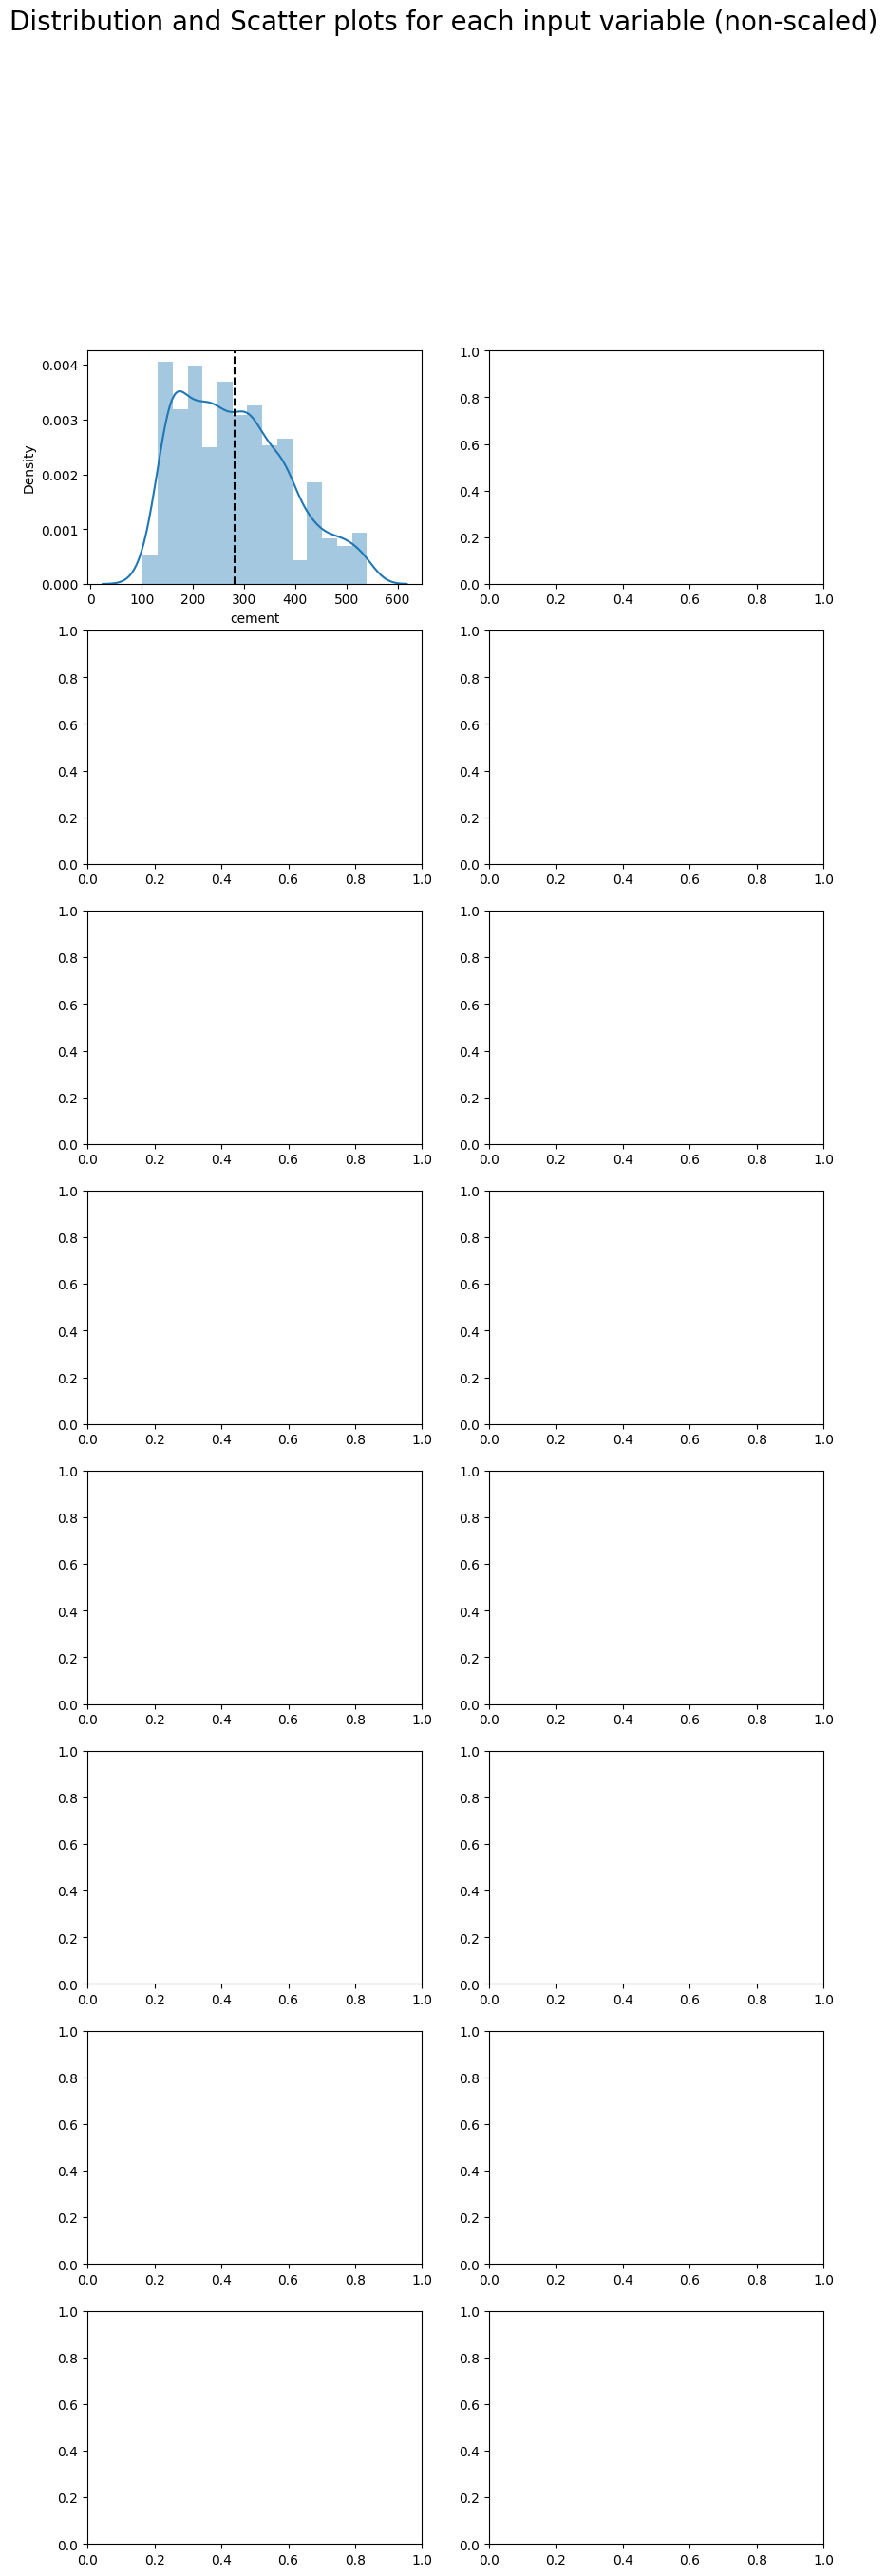

In [9]:
fig, axs = plt.subplots(8, 2, figsize=(10, 30))
fig.suptitle('Distribution and Scatter plots for each input variable (non-scaled)', y = 1, fontsize = 20)

dict = {'Variables': [], 'Mean': [], 'Median':[] , 'Gradient': []}

for i, input in enumerate(concretedata.columns[:-1]):
    dict['Variables'].append(input)

    sns.distplot(concretedata[input], ax=axs[i, 0])
    axs[i,0].axvline(concretedata[input].mean(),linestyle="dashed",label="mean", color='black')
    dict['Mean'].append(concretedata[input].mean())
    dict['Median'].append(concretedata[input].median())
    sns.scatterplot(x=concretedata[input], y=concretedata['csMPa'], hue=input, ax=axs[i, 1], color = 'red', s = 5)
    m,b = np.polyfit(concretedata[input], concretedata['csMPa'], 1)
    axs[i,1].plot(concretedata[input], m*concretedata[input] + b, color='black', linestyle= 'dashed')
    dict['Gradient'].append(m)

plt.tight_layout()
plt.show()
pd.DataFrame(dict)